# Курсовая работа по дисциплине "Технологии анализа данных и машинное обучение" 
## Тема: "Машинное обучение в задачах кредитного скоринга"
### Выполнила: Волкова Татьяна Алексеевна  
### Группа: ПИ19-2.
### Научный руководитель: Добрина Мария Валерьевна

## Установка и мпорт необходимых модулей

In [1]:
!pip install catboost
!pip install lightgbm --install-option=--gpu
!pip install -U xgboost

C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\commands\install.py:229: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)


In [2]:
!wget https://s3-us-west-2.amazonaws.com/xgboost-wheels/xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.cross_decomposition import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.linear_model import *
from sklearn.gaussian_process import *
from sklearn.isotonic import *
from sklearn.kernel_ridge import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.tree import *

import imblearn
from imblearn.combine import *
from imblearn.over_sampling import *
from imblearn.pipeline import Pipeline 

from tqdm.auto import tqdm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

from tqdm.auto import tqdm

import time

## Загрузка  и описание датасета
Для исследования выбран набор данных с соревнования Give Me Some Credit :: 2011 Competition Data | Kaggle.

In [3]:
data = pd.read_csv('cs-training.csv', index_col = 'Unnamed: 0')
data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


#### Размер исходного датасета (кол-во наблюдений, кол-во признаков)

In [5]:
data.shape

(150000, 11)

#### Описание признаков:

RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости и отсутствия задолженности по рассрочке платежа

Age – возраст

NumberOfTime30-59DaysPastDueNotWorse - Количество случаев, когда заемщик допускал просрочку в 30-59 дней, но не хуже за последние 2 года

DebtRation - Ежемесячные выплаты по долгам, алименты, расходы на проживание 

MonthlyIncome – Ежемесячный доход

NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, рассрочка, автокредит или ипотека) и кредитных линий (например, кредитные карты)

NumberOfTimes90DaysLate - Количество случаев, когда заемщик просрочил платеж на 90 дней и более

NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость, включая кредитные линии на покупку жилья

NumberOfTime60-89DaysPastDueNotWorse - Количество случаев, когда заемщик допускал просрочку на 60-89 дней, но не хуже за последние 2 года

NumberOfDependents - Количество иждивенцев в семье, не считая себя (супруг, дети и тд)

#### Типы данных

In [6]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Все признаки относятся к числовым. Преобразовывать ничего не нужно.

#### Количество пропусков в каждом столбце

In [7]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Восстановить пропуски в данных признаках невозможно, поэтому принято решение полностью удалить строки.

In [8]:
data.dropna(inplace=True)
data.shape

(120269, 11)

In [9]:
data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### Распределение признаков

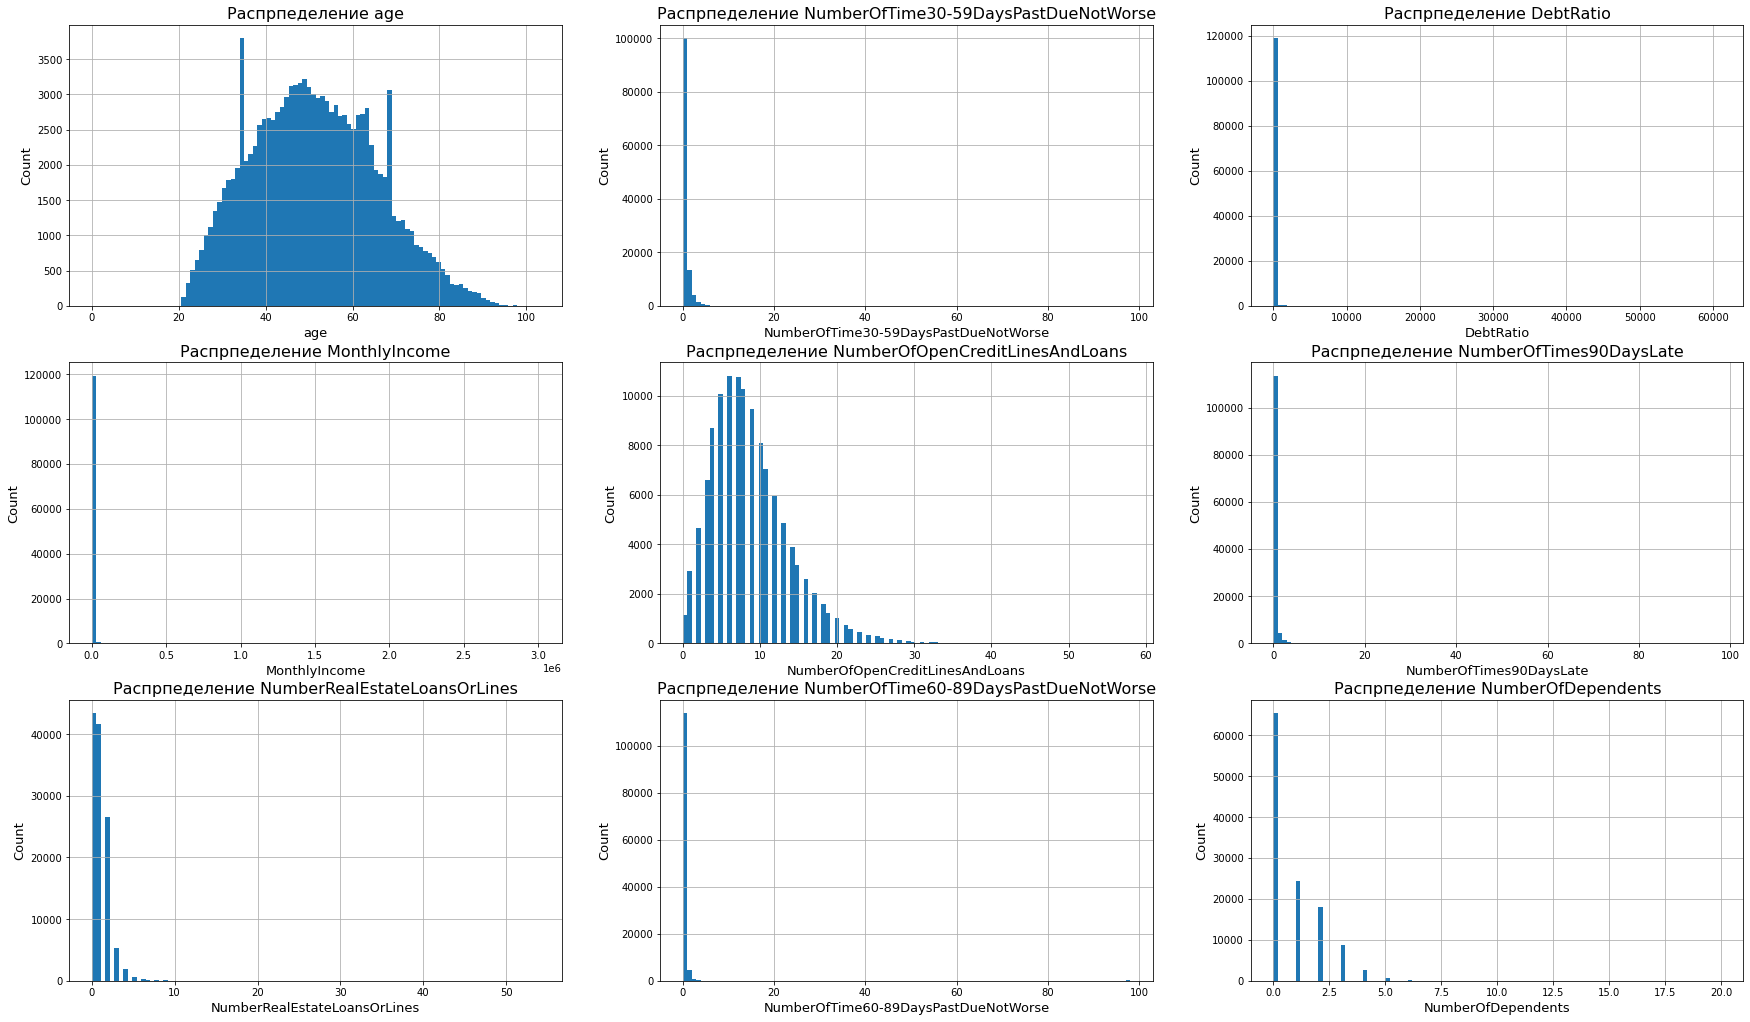

In [10]:
plt.rcParams['figure.figsize'] = (30, 30)
for i, col in enumerate(data.columns[2:]):
    plt.subplot(5, 3, i+1)
    h = data[col].hist(bins=100)
    h.set_title("Рaспрпеделение " + col, size = 16)
    h.set_xlabel(col, size = 13)
    h.set_ylabel('Count', size = 13)
    h.get_figure()

Выбросов не наблюдается.

#### Корреляция признаков между собой

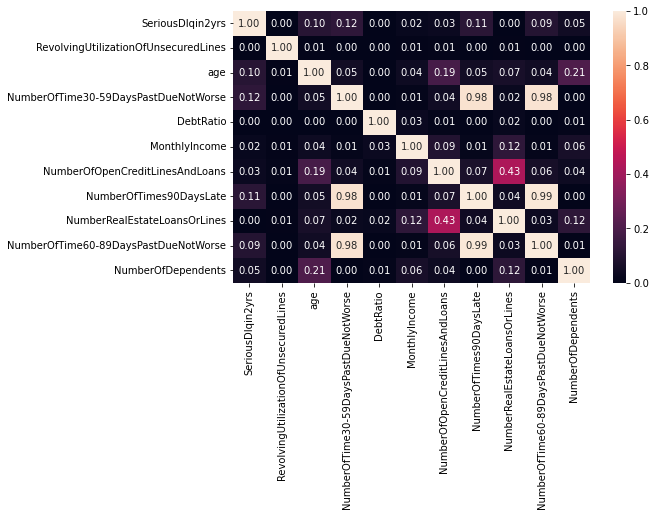

In [11]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f");

Так как значения корреляции небольшие, оставляем все признаки

#### Описательная статистика

In [12]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Эксперимент. Обучение и тестирование моделей

Зададим классификаторы и методы перебалансировки классов.

In [13]:
classifiers = {
              'Catboost':CatBoostClassifier(verbose=False),
              'AdaBoost' : AdaBoostClassifier(n_estimators=100),
              'GradBoost' : GradientBoostingClassifier(),
              'RandomForest' : RandomForestClassifier(),
              'LGBM' : LGBMClassifier(),
              'XGB' : xgb.XGBClassifier(),
              'KNN' : KNeighborsClassifier()
              }

oversamplers = {
               'SMOTE' : SMOTE(),
               'SMOTEN' : SMOTEN(),
               'ADASYN' : ADASYN(),
               'BorderlineSMOTE' : BorderlineSMOTE(),
               'SVMSMOTE' : SVMSMOTE(),
               'SMOTEENN':SMOTEENN(),
               'SMOTETomek':SMOTETomek()
               }

Разделим наш датасет на обучающую и тестовые выборки в соотношение 70:30 соответственно.

In [14]:
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

Создадим таблицы, в которые будем записывать результаты

In [15]:
As = pd.DataFrame(index = oversamplers.keys(),
                       columns = classifiers.keys())
Ps = pd.DataFrame(index = oversamplers.keys(),
                       columns = classifiers.keys())
Rs = pd.DataFrame(index = oversamplers.keys(),
                       columns = classifiers.keys())
F1s = pd.DataFrame(index = oversamplers.keys(),
                       columns = classifiers.keys())
times = pd.DataFrame(index = oversamplers.keys(),
                       columns = classifiers.keys())
results = pd.DataFrame(index = oversamplers.keys(),
                       columns = classifiers.keys())
matrices = []

Процесс обучения и тестирования:

Метода fit - обучяет модель на тренировочной выборке

Метода predict - тестирует модель на тестирующей выборке

Функции accuracy_score, precision_score, recall_score, f1_score - расчитывают соответственно метрики достоверности предсказания,точности, полноты и F1 соответственно

Также я ввела новую собственную метрика штрафов – F = 5 ∗ FP + 1 ∗ FN

Функция confusion_matrix - расчитывает матрицу ошибок

In [16]:
for i in tqdm(oversamplers.keys()):
    for j in tqdm(classifiers.keys()):
        
        pipeline = Pipeline(
            [
             ('oversamplingmethod', oversamplers[i]),
             ('model', classifiers[j])
            ],
            verbose = False
        )
        
        start = time.time()
        pipeline.fit(X_train, y_train)
        end = time.time()
        
        y_pred = pipeline.predict(X_test)
        
        As.loc[i, j] = accuracy_score(y_test, y_pred)
        Ps.loc[i, j] = precision_score(y_test, y_pred)
        Rs.loc[i, j] = recall_score(y_test, y_pred)
        F1s.loc[i, j] = f1_score(y_test, y_pred)
        times.loc[i, j] = round(end - start, 2)
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        results.loc[i, j] = fp * 1 + fn * 5
        
        matrices.append(confusion_matrix(y_test, y_pred))

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

#### Матрицы ошибок

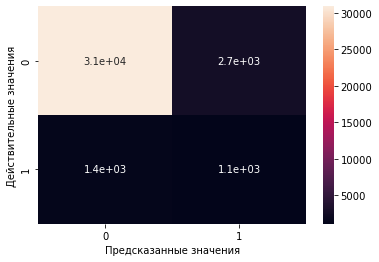

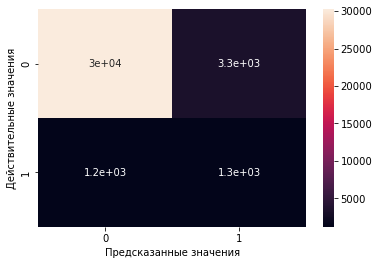

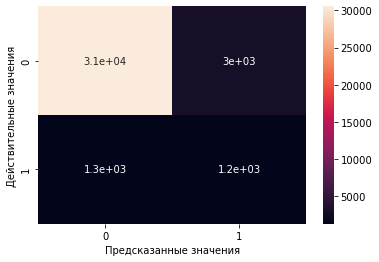

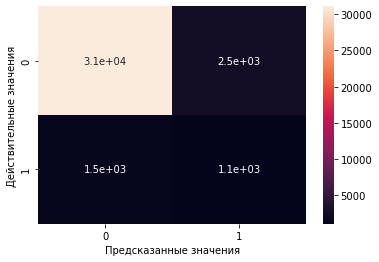

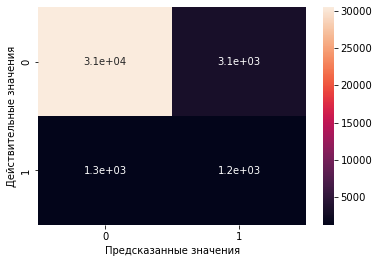

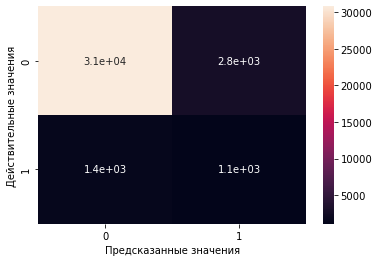

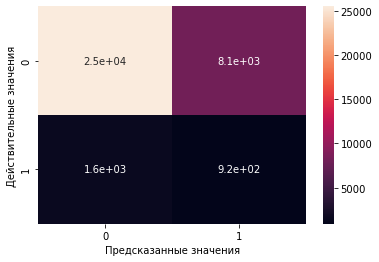

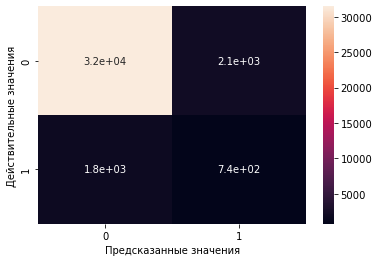

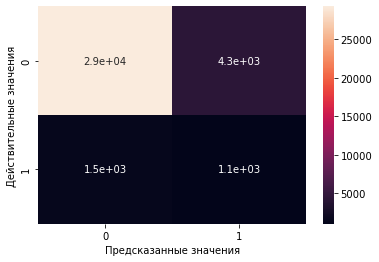

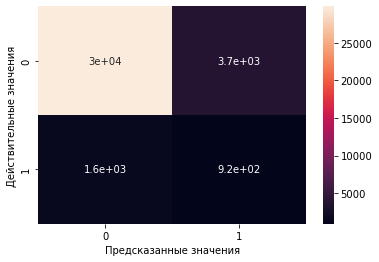

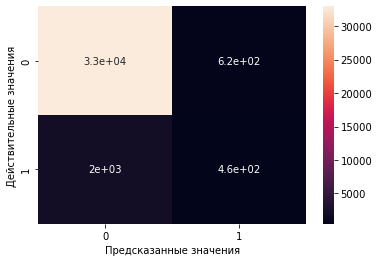

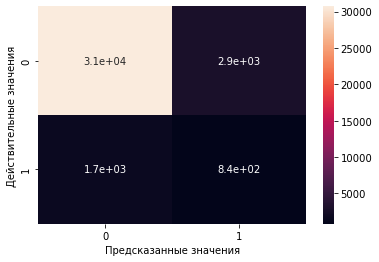

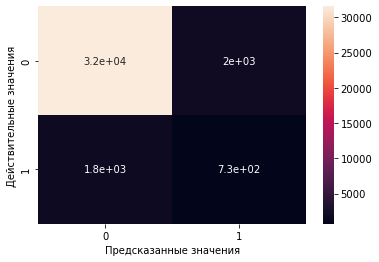

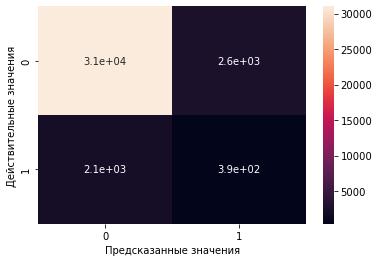

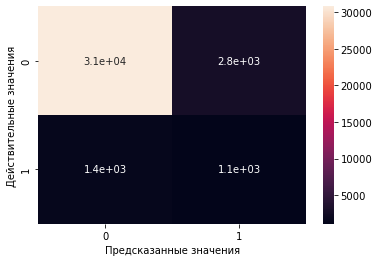

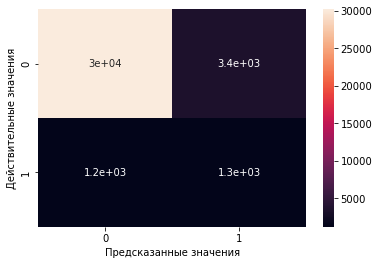

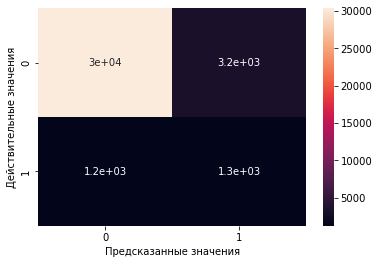

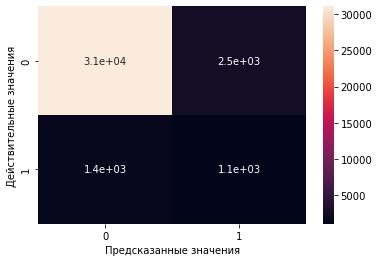

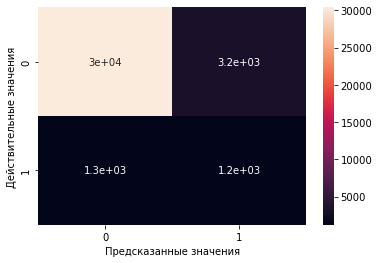

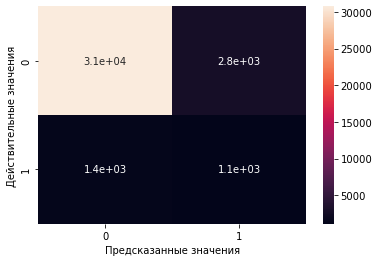

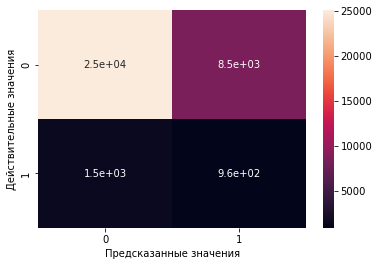

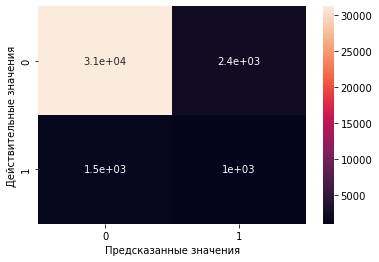

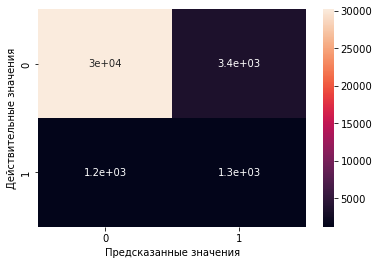

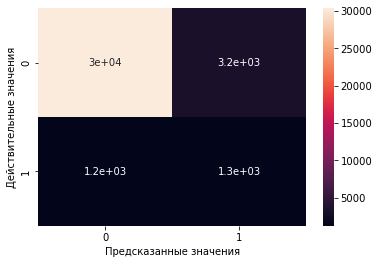

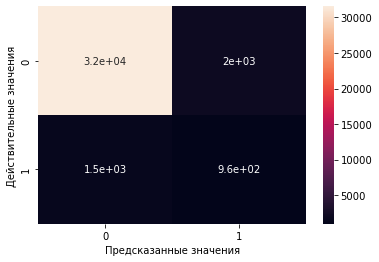

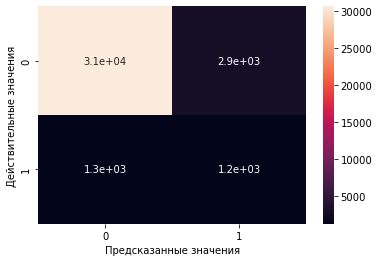

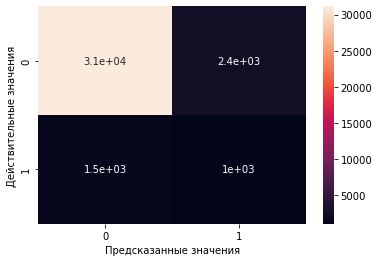

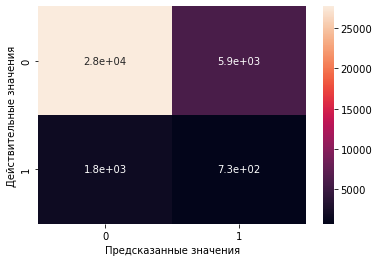

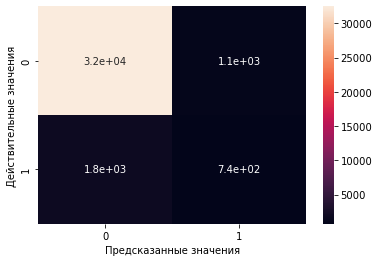

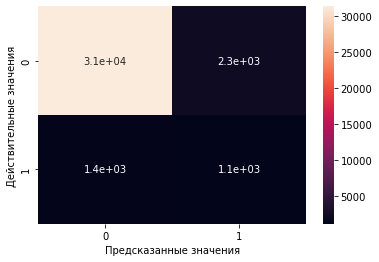

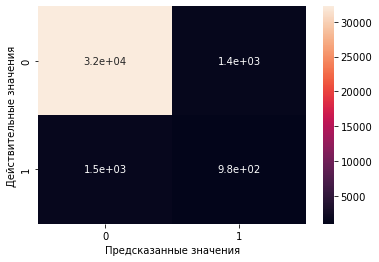

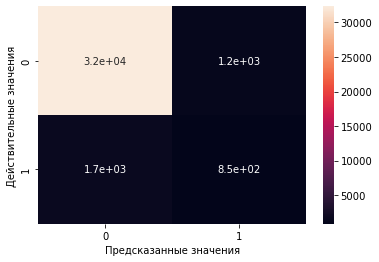

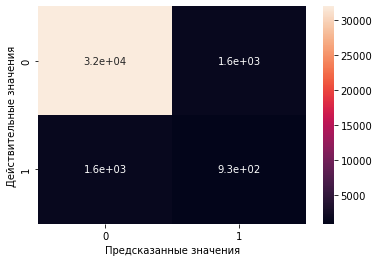

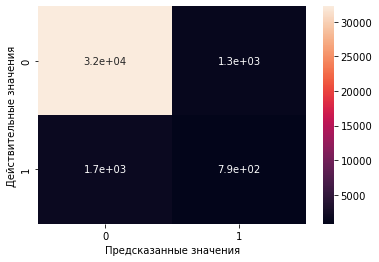

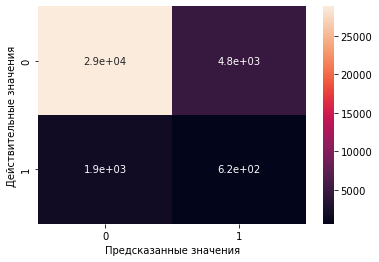

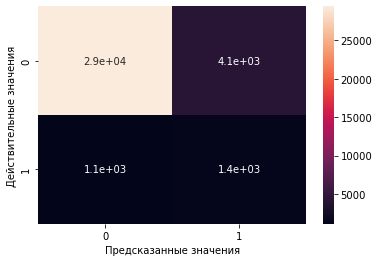

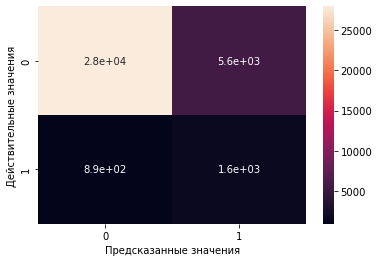

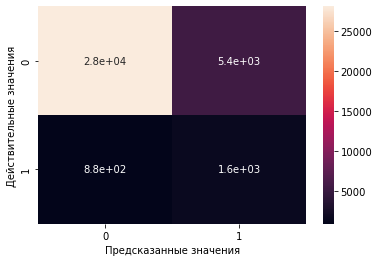

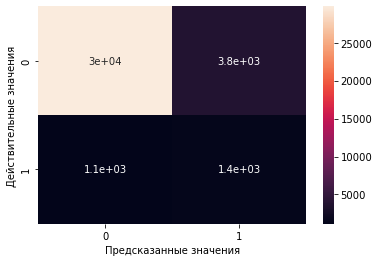

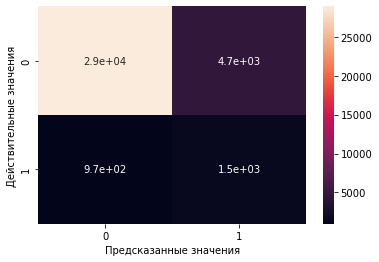

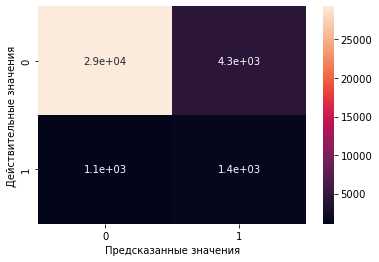

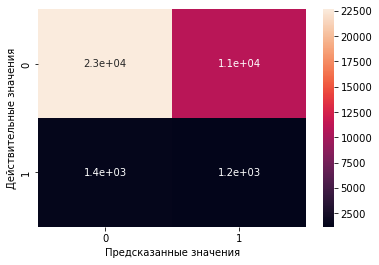

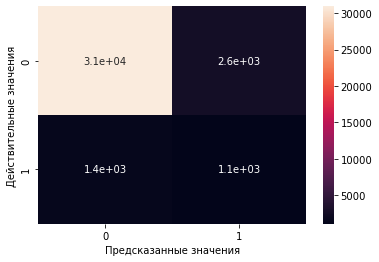

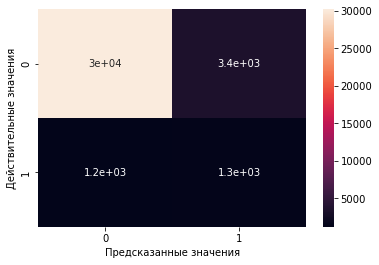

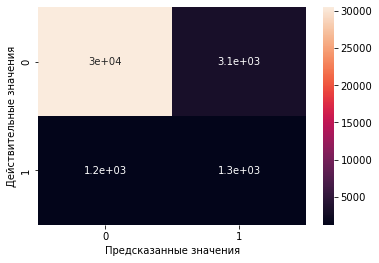

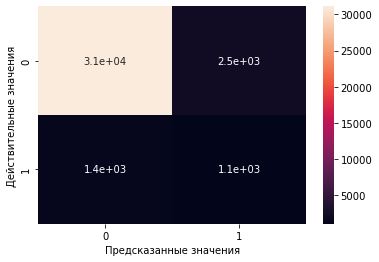

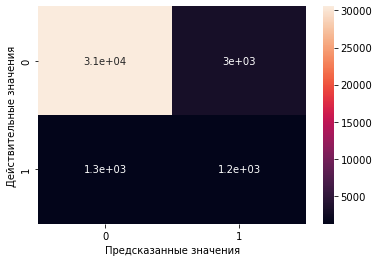

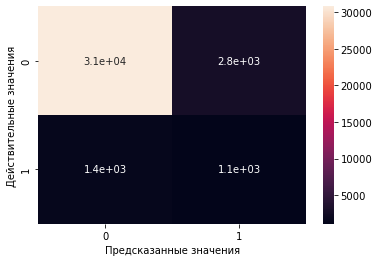

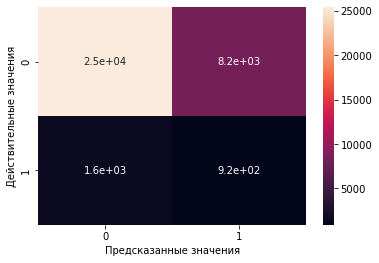

In [17]:
%matplotlib inline
for matrix in matrices:
    sns.heatmap(pd.DataFrame(
    matrix),
    annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

#### Метрика достоверности предсказания

Accuracy = (TN + TP)/(TN + FP + TP + FN)

In [18]:
As.style.background_gradient().set_properties(**{'font-size': '15px'})

,Catboost,AdaBoost,GradBoost,RandomForest,LGBM,XGB,KNN
SMOTE,0.886228,0.873535,0.881378,0.891023,0.879438,0.883568,0.732075
SMOTEN,0.893601,0.841357,0.852776,0.926166,0.874421,0.894598,0.870458
ADASYN,0.883762,0.872481,0.876140,0.890330,0.876666,0.882875,0.721959
BorderlineSMOTE,0.893656,0.871872,0.876334,0.901472,0.883346,0.891245,0.787534
SVMSMOTE,0.920484,0.899254,0.919819,0.919487,0.913168,0.915385,0.815665
SMOTEENN,0.854882,0.820626,0.825171,0.863779,0.843962,0.850974,0.658879
SMOTETomek,0.886699,0.872592,0.879577,0.892159,0.880962,0.883983,0.728555


#### Метрика точности

Precision = TP / (TP + FP) 

In [19]:
Ps.style.background_gradient().set_properties(**{'font-size': '15px'})

,Catboost,AdaBoost,GradBoost,RandomForest,LGBM,XGB,KNN
SMOTE,0.287387,0.278257,0.292340,0.298558,0.285548,0.280000,0.102311
SMOTEN,0.263494,0.197707,0.197411,0.427516,0.226190,0.264364,0.132338
ADASYN,0.280510,0.276759,0.281514,0.297712,0.278953,0.280235,0.101978
BorderlineSMOTE,0.304871,0.275372,0.284454,0.323925,0.293647,0.294459,0.110406
SVMSMOTE,0.401950,0.334895,0.418012,0.404876,0.373688,0.371951,0.115584
SMOTEENN,0.253389,0.224615,0.230234,0.266576,0.247698,0.248687,0.095368
SMOTETomek,0.286755,0.278320,0.289703,0.303297,0.289746,0.280293,0.100537


#### Метрика полноты

Recall = TP / (TP + FN)

In [20]:
Rs.style.background_gradient().set_properties(**{'font-size': '15px'})

,Catboost,AdaBoost,GradBoost,RandomForest,LGBM,XGB,KNN
SMOTE,0.430794,0.514559,0.497806,0.421221,0.489430,0.429996,0.367371
SMOTEN,0.295971,0.419625,0.364978,0.184683,0.333466,0.289988,0.155564
ADASYN,0.429996,0.517750,0.504188,0.425608,0.489031,0.437176,0.384523
BorderlineSMOTE,0.414440,0.517351,0.514559,0.384523,0.483047,0.404866,0.291584
SVMSMOTE,0.295971,0.456322,0.392501,0.337854,0.369366,0.316314,0.248504
SMOTEENN,0.559234,0.644994,0.646988,0.548464,0.611488,0.566414,0.460710
SMOTETomek,0.424013,0.523335,0.504986,0.425608,0.491424,0.427204,0.365776


#### Метрика F1
Среднее гармоническое между Precision и Recall

In [21]:
F1s.style.background_gradient().set_properties(**{'font-size': '15px'})

,Catboost,AdaBoost,GradBoost,RandomForest,LGBM,XGB,KNN
SMOTE,0.344773,0.361193,0.368359,0.349437,0.360670,0.339154,0.160049
SMOTEN,0.278790,0.268779,0.256231,0.257939,0.269547,0.276584,0.143014
ADASYN,0.339528,0.360706,0.361298,0.350353,0.355259,0.341539,0.161204
BorderlineSMOTE,0.351310,0.359429,0.366373,0.351632,0.365254,0.340947,0.160167
SVMSMOTE,0.340914,0.386291,0.404855,0.368341,0.371515,0.341884,0.157781
SMOTEENN,0.348756,0.333196,0.339615,0.358774,0.352576,0.345625,0.158024
SMOTETomek,0.342131,0.363385,0.368184,0.354191,0.364551,0.338496,0.157723


#### Время обучения

Весь пайплайн обучения занял 30 минут

In [22]:
times = times.astype(int)
times.style.background_gradient().set_properties(**{'font-size': '15px'})

,Catboost,AdaBoost,GradBoost,RandomForest,LGBM,XGB,KNN
SMOTE,31,25,48,44,1,9,1
SMOTEN,99,81,95,98,62,68,63
ADASYN,31,24,45,46,2,10,2
BorderlineSMOTE,32,23,43,43,2,10,2
SVMSMOTE,147,136,164,159,122,131,124
SMOTEENN,45,33,49,49,21,27,21
SMOTETomek,45,36,57,53,17,24,17


#### Собственная метрика штрафов – F = 5 ∗ FP + 1 ∗ FN

Смысл её состоит в том, что для бизнеса неплатёжеспособный клиент, предсказанный обратным, приносит в разы больше потерь, чем в обратном случае. Поэтому общая оценка модели будет заключаться в суммарных штрафных баллах, посчитанных на основе матрицы ошибок классификации.

In [23]:
results = results.astype(int)
results.style.background_gradient().set_properties(**{'font-size': '15px'})

,Catboost,AdaBoost,GradBoost,RandomForest,LGBM,XGB,KNN
SMOTE,9813,9431,9316,9736,9470,9917,16011
SMOTEN,10899,11544,11680,10840,11215,10923,13142
ADASYN,9910,9437,9441,9717,9574,9870,16204
BorderlineSMOTE,9709,9463,9330,9727,9393,9892,14770
SVMSMOTE,9929,9087,8985,9545,9457,9909,14187
SMOTEENN,9656,10032,9848,9443,9526,9725,17716
SMOTETomek,9864,9377,9309,9651,9395,9930,16154


## Выводы о моделях

Как видно из результатов 
- наилучшая комбинация – классический градиентный бустинг (GradBoost) после применения перебалансировки с помощью SVMSMOTE
- наилучшая модель - LGBM
- наилучший балансировщик - SVMSMOTE 
- наихудшая модель – KNN 
- наихудший балансировщик – SMOTEN

## Подбор гиперпараметров 

In [24]:
# Функция для подсчета метрики штрафов
def custom_loss(y_pred, y_test):
    tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
    return (fp * 1 + fn * 5)

#### Метрики без подбора параметров

In [25]:
print(f"Accuracy -> {As['GradBoost']['SVMSMOTE']}")
print(f"Precision -> {Ps['GradBoost']['SVMSMOTE']}")
print(f"Recall -> {Rs['GradBoost']['SVMSMOTE']}")
print(f"F1 -> {F1s['GradBoost']['SVMSMOTE']}")
print(f"Метрика штрафов -> {results['GradBoost']['SVMSMOTE']}")

Accuracy -> 0.9198192954740723
Precision -> 0.4180118946474087
Recall -> 0.3925009972078181
F1 -> 0.40485496811355687
Метрика штрафов -> 8985


#### С подбором параметров 

In [26]:
%%time
X_sm, y_sm = SVMSMOTE().fit_resample(X_train, y_train)

GB_model = GradientBoostingClassifier()

parametrs = {'loss': ['deviance', 'exponential'],
              "learning_rate": [0.1, 0.25, 0.5, 1], 
              'n_estimators': [25, 50, 100, 150],
              'subsample':[0.5, 1]
            }

grid = GridSearchCV(GB_model, parametrs, n_jobs = -1, scoring = 'f1')
grid.fit(X_sm, y_sm)
grid.best_params_

Wall time: 27min 21s


{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 150, 'subsample': 1}

In [27]:
GB_model = GradientBoostingClassifier(**grid.best_params_)                              
GB_model.fit(X_sm, y_sm)
y_pred = GB_model.predict(X_test)

print(f'Accuracy -> {accuracy_score(y_pred, y_test)}')
print(f'Precision -> {precision_score(y_pred, y_test)}')
print(f'Recall -> {recall_score(y_pred, y_test)}')
print(f'F1 -> {f1_score(y_pred, y_test)}')
print(f'Метрика штрафов -> {custom_loss(y_pred, y_test)}')

Accuracy -> 0.9018042737174691
Precision -> 0.3558037495013961
Recall -> 0.31631205673758866
F1 -> 0.33489769100807215
Метрика штрафов -> 11255


Как мы видим, подбор параметров не требовался. Все метрики стали хуже, особенно метрика штрафов.

# Вывод:
#### Наилучшее сочетание - градиентный бустинг (GradBoost) после применения перебалансировки с помощью SVMSMOTE без подбора параметров (GridSearchCV)